In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v0 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

/Users/martin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


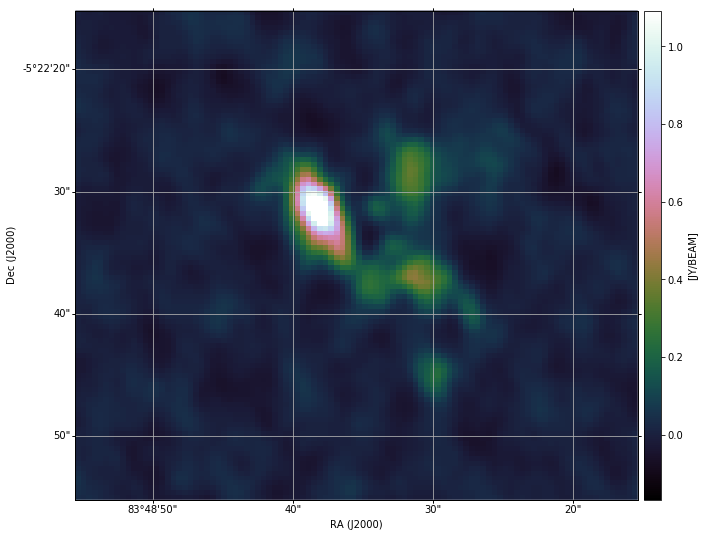

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

/Users/martin/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


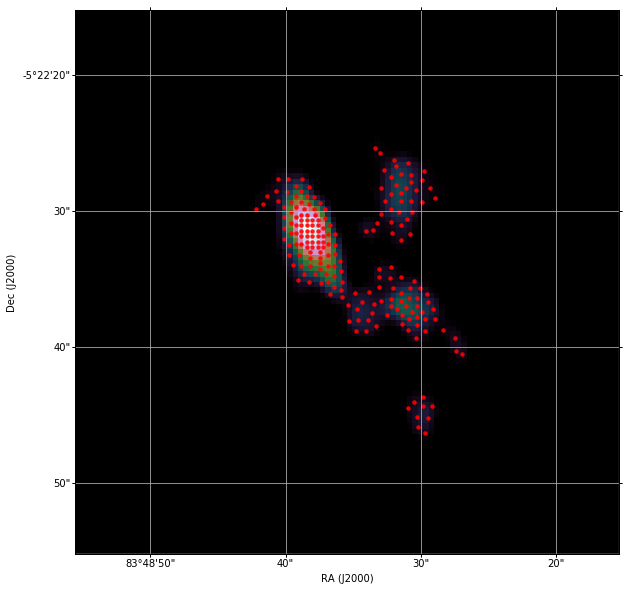

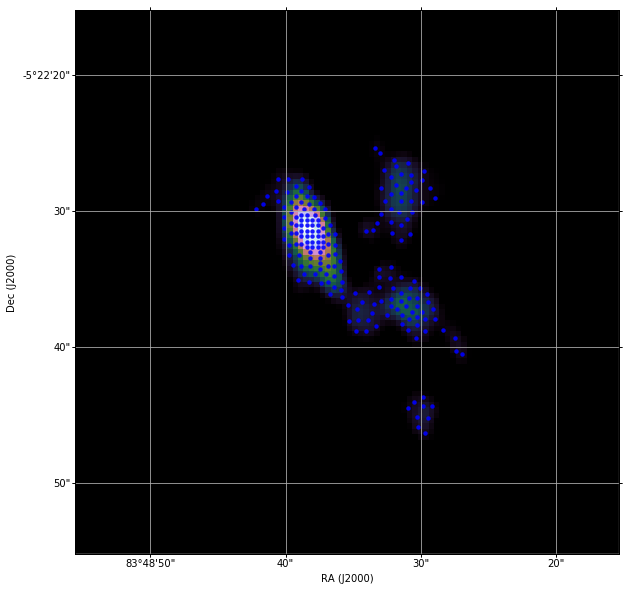

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200)

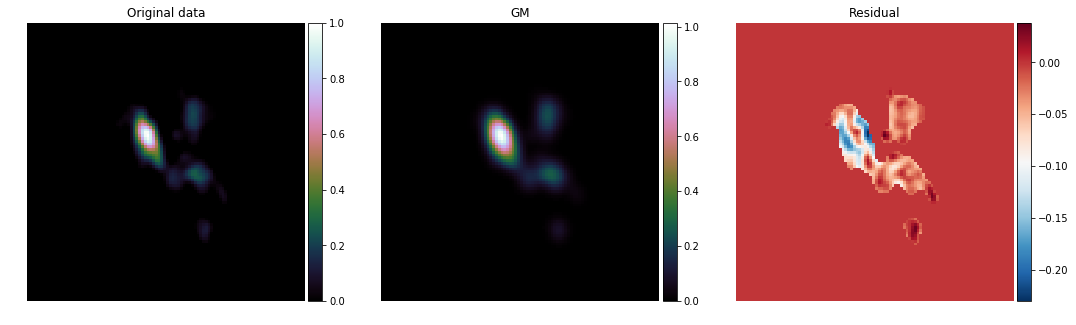

RESIDUAL STATS
RMS of residual: 0.018875078907181746
Variance of residual: 0.00034340385652255047
Normalized flux addition: 0.3285861512010092
Normalized flux lost: 0.007985207465080607


In [5]:
hdmc.get_residual_stats();

xtol: 1e-07
ftol: 1e-07


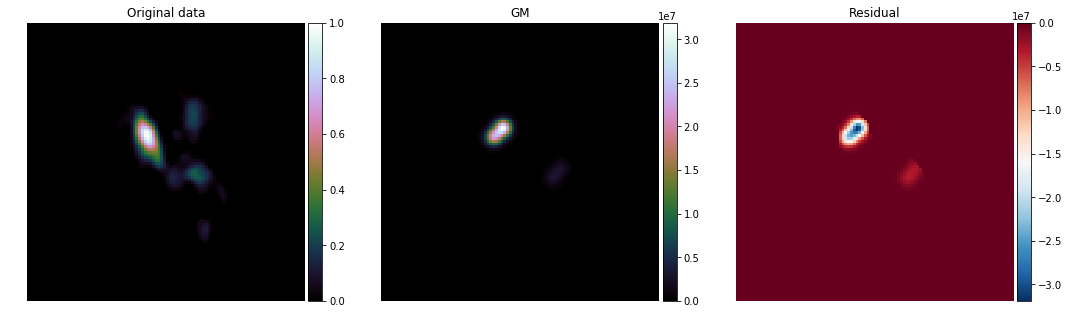

RESIDUAL STATS
RMS of residual: 1523085.9463975453
Variance of residual: 2298870236393.899
Normalized flux addition: 12928580.955154888
Normalized flux lost: 0.004591926840569866


In [6]:
hdmc.build_gmr()
hdmc.get_residual_stats();

In [7]:
hdmc.solver_output()

SOLVER OUTPUT
success: False
status: 5
message: Number of calls to function has reached maxfev = 40200.
nfev: 40214
